# SEN4018 Project

## Dataset Description:

The Pima Indians Diabetes Databas is provided by The National Institute of Diabetes and Digestive and Kidney Diseases. This dataset is a subset of the larger dataset. In this dataset, all of the patients, are Pima Indian women who are at least 21 years old. The dataset contains 8 medical predictor factors:
<ol>
  <li>Number of times pregnant</li>
  <li>Plasma glucose concentration a 2 hours in an oral glucose tolerance test</li>
  <li>Diastolic blood pressure (mm Hg)</li>
  <li>Triceps skin fold thickness (mm)</li>
  <li>2-Hour serum insulin (mu U/ml)</li>
  <li>Body mass index (weight in kg/(height in m)^2)</li>
  <li>Diabetes pedigree function</li>
  <li>Age (years)</li>
</ol> 
And there is also the dependent variable, the "Outcome" which is either equal to 1 or 0.

In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv("diabetes.csv")

# print(df.isnull().sum().sum()) # sum of null values in data

# print(df.head())
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
# minimum value of the following variables can not be zero
#Glucose - BloodPressure - SkinThickness - Insulin - BMI

# Therefore replacing zeros with nan then with suitable values

df_copy= df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


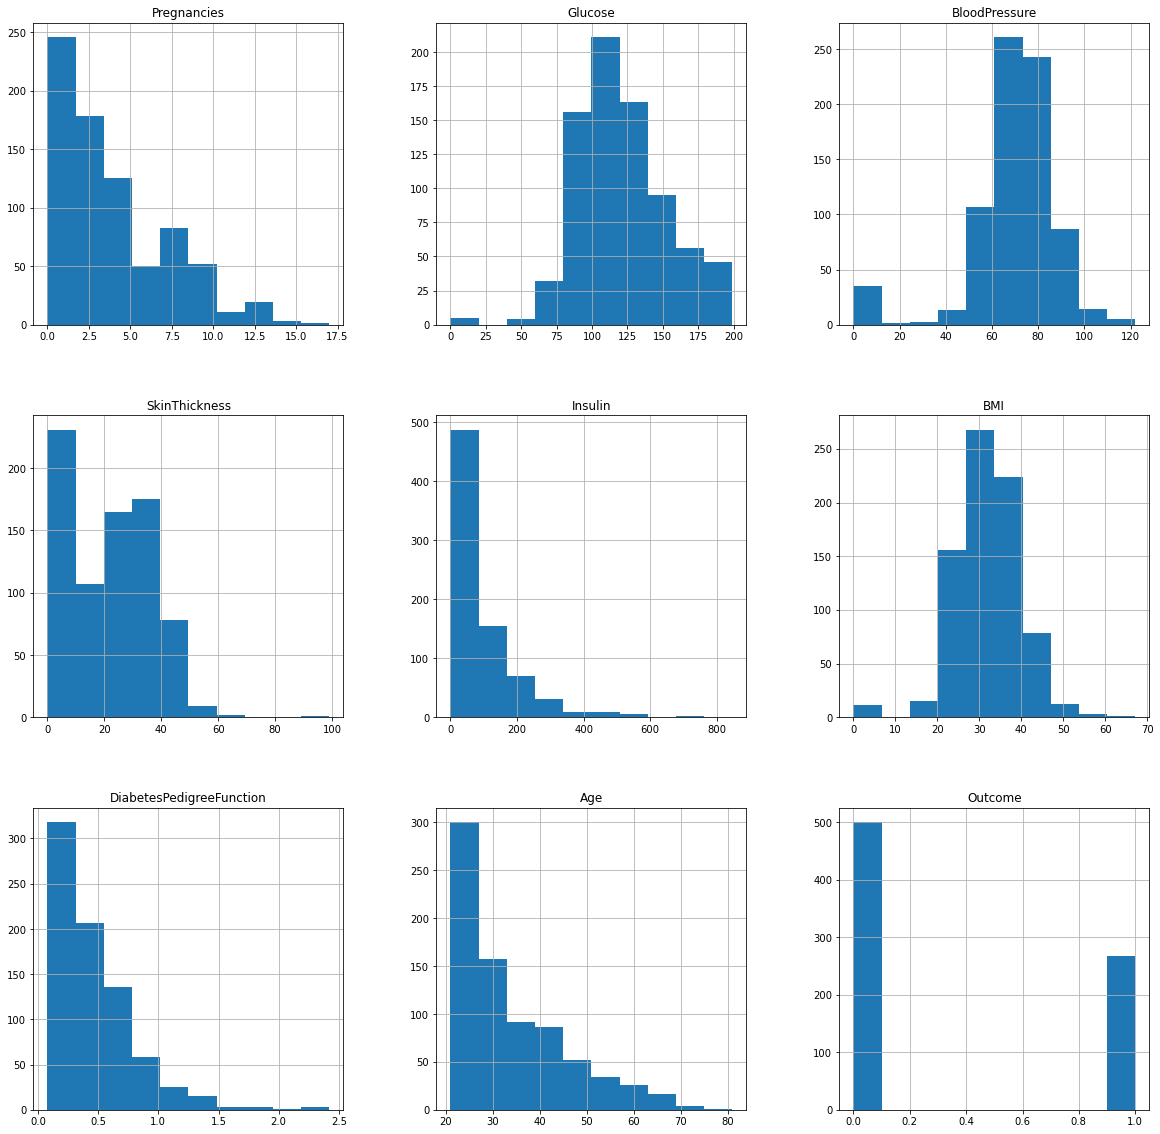

In [7]:
# check data distribution to understand what to fill the nan values with

p = df.hist(figsize = (20,20))


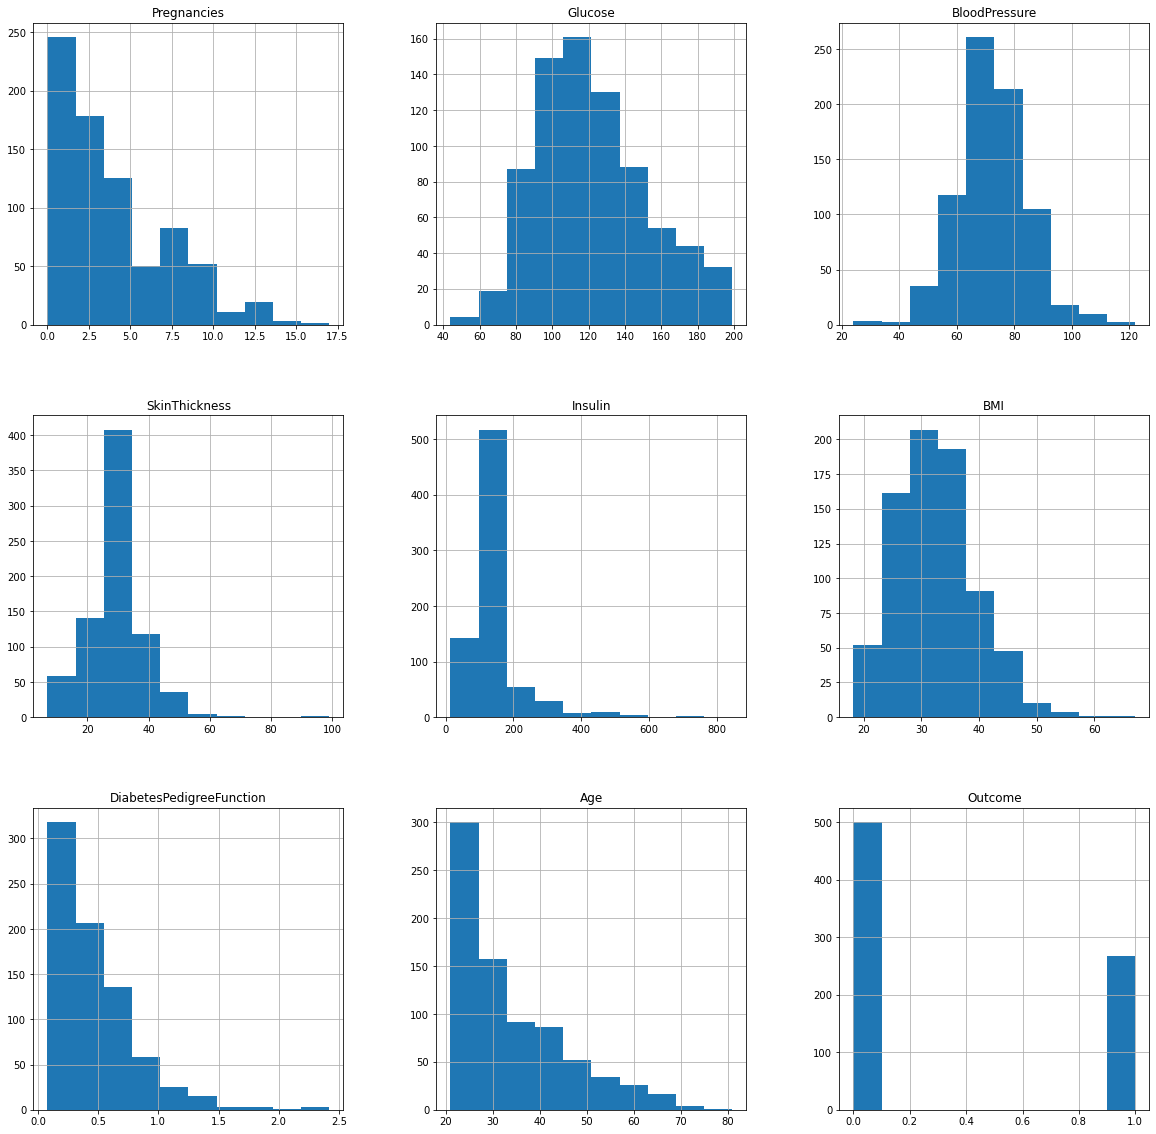

In [8]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

p = df_copy.hist(figsize = (20,20))

## Data selection:

## Data Preprocessing:

## Data Transformation:

## Feature Selection:

## Dataset Splitting:

## Modeling: